<a href="https://colab.research.google.com/github/dev-zohaib/KNN_based_Iris_Classification/blob/master/KNN_based_Iris_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Iris Classification Scikit learn Practice 

# Modeling Iris Dataset
* Using Scikit Learn

## Summary of this project



1. Loading and Understanding Data
2. Visualizing Data
3. Deciding RegreRegression or ClassiClassification 
4. Creating a Model using `Scikit`
5. Testing 
6. Tuning the model(Deciding no of neighbors in case on `KNN`)   
7. Prediction 



# Loading and Understanding Iris Data 

In [0]:
"""
from sklearn import datasets
iris = datasets.load_iris()
        or 
you can import the dataset form the other way
"""
from sklearn.datasets import load_iris
iris = load_iris()

In [4]:
# lets cheek the type of dataset
type(iris)
# it is "bunch" object contains data and its attributes

sklearn.utils.Bunch

In [7]:
# lets prints its features and targets names

print("Features : ")
print(iris.feature_names)
print("Target : ")
print(iris.target_names)

"""
features values are store in iris.data
target values are store in iris.target
"""

Features : 
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target : 
['setosa' 'versicolor' 'virginica']


In [22]:
# lets cheek the the features value and target values

X = iris.data
y = iris.target

# cheeking the type of target and features
print(type(iris.data))
print(type(iris.target))

# printing the 1st sample of features , note the syntax means zeroth row or sary columns 
print(X[0,:])
print(y) # note that data is encoded already 
print(iris.target_names) 

"""
target names are :
setosa      : 0
Versicolor  : 1 
virginica   : 2
"""

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[5.1 3.5 1.4 0.2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']


In [23]:
# lets cheek the data shape
print(X.shape)
print(y.shape)

"""
So the dimensin of our data is 150 row and 4 columbs: 150x4
dimension of target is 1 row and 150 colum 

note: we can use reshape(-1,1) to covert it into 150x1
"""


(150, 4)
(150,)


# Visualization of Data
1. Converting numpy array into Dataframe for data visualization
2. Plotting different category based on Sepal length and width
3. Plotting different category based on Petal length and width


In [28]:
# let convert the data into pandas DataFrame it would be easy to understand and visualize

import pandas as pd
data = pd.DataFrame(X, columns=iris.feature_names)
data['target'] = pd.DataFrame(y.reshape(-1,1), columns=["target"])
data.head() # by default head() method show the top 5 entry of data you can pass any interger to the table 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


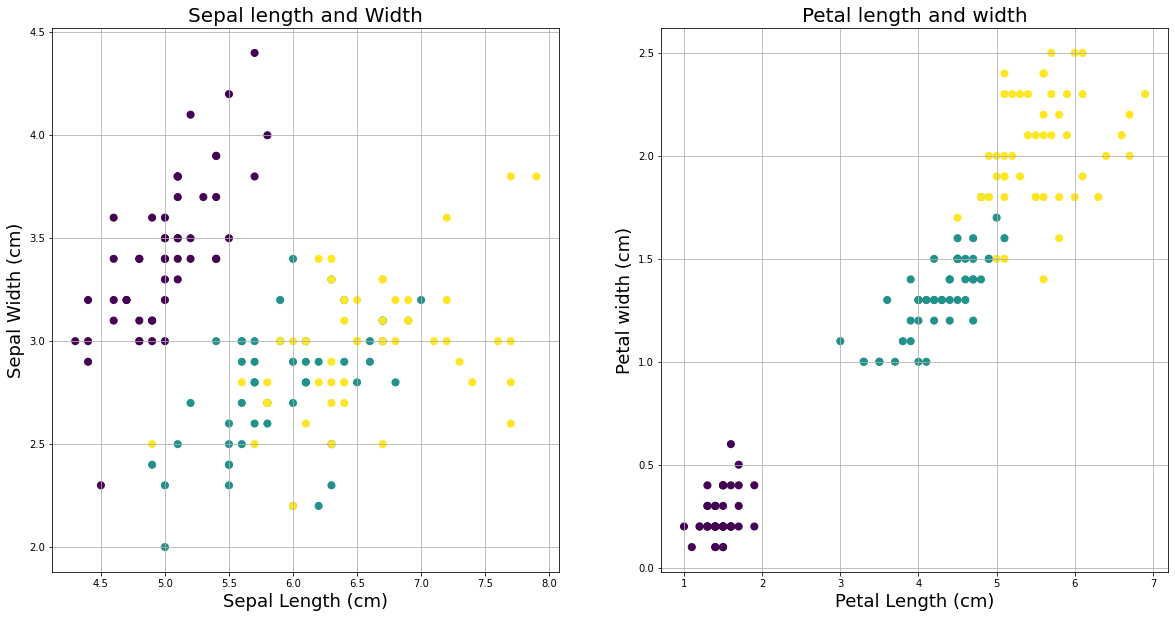

In [42]:
from matplotlib import pyplot as plt 

fig = plt.figure(figsize=(20,10))
graph = fig.add_subplot(121)
graph.set_title("Sepal length and Width",fontsize =20)
graph.set_xlabel('Sepal Length (cm)', fontsize=18)
graph.set_ylabel('Sepal Width (cm)',fontsize=18)
graph.grid(True)
graph.scatter(data['sepal length (cm)'], data['sepal width (cm)'], s = 50, 
           c=data['target'], marker='o')

# Sepal Length and Width
graph = fig.add_subplot(122)
graph.set_title("Petal length and width", fontsize=20)
graph.set_xlabel('Petal Length (cm)', fontsize=18)
graph.set_ylabel('Petal width (cm)', fontsize=18)
graph.grid(True)
graph.scatter(data['petal length (cm)'], data['petal width (cm)'], s = 50, 
           c=data['target'], marker='o')

***`So the above analysis show that we can use on 2 features to predict our target class. `***

# Chossing the model 
lets choose Knn model
## KNN Classification
1. pick the value of k(e.g 5,6,7,8) 
*`We will see HOW we choose k `*
2. Model calculates the numerical distance of the unknown iris to the known iris data and finds the k smallest distances in the data set
3. From the k observations, we predict our target class.

In [0]:

# Split X and y into training and testing sets. Here 40% is for testing
from sklearn.model_selection  import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state = 1111)

In [51]:
# printing the X shapes
print(X_train.shape)
print(X_test.shape)

# printing the y shapes
print(y_train.shape)
print(y_test.shape)

(90, 4)
(60, 4)
(90,)
(60,)


Test for KNN(k=5)

In [52]:
# import model
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics # for measuring accuracy

# instantiating model. Choosing K=5
knn = KNeighborsClassifier(n_neighbors=5)

# train
knn.fit(X_train, y_train)

# predict
y_pred = knn.predict(X_test)

# test accuracy
print(metrics.accuracy_score(y_test, y_pred))


0.9833333333333333


Test for KNN(k=1)

In [53]:
# instantiate class
knn = KNeighborsClassifier(n_neighbors = 1)

# train
knn.fit(X_train, y_train)

# predict
y_pred = knn.predict(X_test)

# test accuracy
print(metrics.accuracy_score(y_test, y_pred))

0.95


**AS you can see that changing the no of k change the accuracy of model , now how to find the best value of k?**

# Model Tuning -Finding the best value of k
* let cheek the accuracy socore for differnt values of K and find the best value of k.

In [56]:
k_range = range(1, 30) 
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
"""
1-We declare the range of k from 1 to 10
2-Then declare a empty list to save the accuracy for evert k
3-then we loop through the every value of k and initialize the model with current vlaue of k.
4-then train the model.
5-them make the predicton on unseen data 
6 then calucalte the accuracy and append in the empty list.
"""

'\n1-We declare the range of k from 1 to 10\n2-Then declare a empty list to save the accuracy for evert k\n3-then we loop through the every value of k and initialize the model with current vlaue of k.\n4-then train the model.\n5-them make the predicton on unseen data \n6 then calucalte the accuracy and append in the empty list.\n'

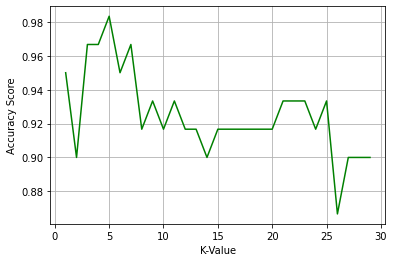

In [58]:
# plot the relationship between K and testing accuracy
plt.plot(k_range, scores, color="green")
plt.xlabel("K-Value")
plt.ylabel("Accuracy Score") 
plt.grid(True)

# So the grphy show that which is best value for k.

In [78]:
import numpy as np
knn = KNeighborsClassifier(n_neighbors=5)

# training the model using all data
knn.fit(X, y)
sample =np.array([[3, 5, 4, 2]])
print(sample.shape)
#making predictions on out-of-sample data
knn.predict(sample)

(1, 4)


array([1])